In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib widget

### Taux de pauvreté

In [2]:
data_pauvrete = pd.read_excel('Data/revenu.xlsx', 'DEP')

In [3]:
data_pauvrete = data_pauvrete.iloc[5:, [0, 1, 6]]

In [4]:
data_pauvrete.columns = ['Code', 'Département', 'Taux de pauvreté']

In [5]:
data_pauvrete.sort_values(by='Code')

,Code,Département,Taux de pauvreté
5,01,Ain,10.5
6,02,Aisne,18.5
7,03,Allier,15.4
8,04,Alpes-de-Haute-Provence,16.6
9,05,Hautes-Alpes,13.9
...,...,...,...
98,93,Seine-Saint-Denis,27.9
99,94,Val-de-Marne,16.3
100,95,Val-d'Oise,16.6
101,972,Martinique,28.6


- Statistiques pauvreté

In [6]:
taux_pauvrete = data_pauvrete.iloc[:, 2]
taux_pauvrete.mean()

14.812244897959182

In [7]:
taux_pauvrete.std()

4.094936911667957

In [8]:
taux_pauvrete.median()

14.4

### Taux de suicide (pour 1 million d'habitants)

In [9]:
data_suicide = pd.read_csv('Data/taux-suicide.csv', sep=';')

In [10]:
data_suicide = data_suicide[2:]

In [11]:
data_suicide.columns = ['Code', 'Département', 'Taux de suicide']

In [12]:
data_suicide['Taux de suicide'] = pd.to_numeric(data_suicide['Taux de suicide'])

In [13]:
data_suicide.dtypes

Code                object
Département         object
Taux de suicide    float64
dtype: object

- Statistiques suicide

In [14]:
taux_suicide = data_suicide['Taux de suicide']

In [15]:
taux_suicide.mean()

155.65247524752476

In [16]:
taux_suicide.median()

156.4

In [17]:
taux_suicide

2      110.5
3      224.1
4      161.8
5      145.5
6      144.5
       ...  
101    141.9
102      NaN
103     10.3
104      NaN
105      NaN
Name: Taux de suicide, Length: 104, dtype: float64

## Correlation taux de suicide et taux de pauvreté

In [18]:
df = data_suicide.merge(data_pauvrete, on='Département')
df

,Code_x,Département,Taux de suicide,Code_y,Taux de pauvreté
0,01,Ain,110.5,01,10.5
1,02,Aisne,224.1,02,18.5
2,03,Allier,161.8,03,15.4
3,04,Alpes-de-Haute-Provence,145.5,04,16.6
4,05,Hautes-Alpes,144.5,05,13.9
...,...,...,...,...,...
92,92,Hauts-de-Seine,96.8,92,11.8
93,93,Seine-Saint-Denis,58.6,93,27.9
94,94,Val-de-Marne,77.6,94,16.3
95,95,Val-d'Oise,85.4,95,16.6


In [19]:
suicide = pd.Series(df['Taux de suicide'], dtype=np.dtype("int32"))

In [20]:
suicide

0     110
1     224
2     161
3     145
4     144
     ... 
92     96
93     58
94     77
95     85
96     84
Name: Taux de suicide, Length: 97, dtype: int32

In [21]:
pauvrete = pd.Series(df['Taux de pauvreté'], dtype=np.dtype("int32"))

In [22]:
pauvrete

0     10
1     18
2     15
3     16
4     13
      ..
92    11
93    27
94    16
95    16
96    28
Name: Taux de pauvreté, Length: 97, dtype: int32

In [23]:
suicide.corr(pauvrete)

-0.07445921412341729

In [24]:
pauvrete.corr(suicide)

-0.07445921412341729

- Regression

In [25]:
import scipy.stats

In [26]:
slope, intercept, r, p, stderr = scipy.stats.linregress(suicide, pauvrete)

In [27]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=14.76+-0.00x, r=-0.07'

In [52]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

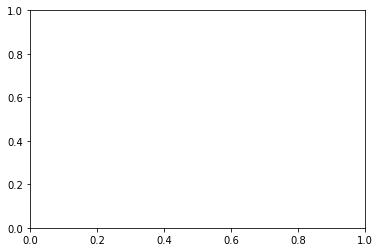

In [47]:
fig, ax = plt.subplots()

In [29]:
ax.plot(suicide, pauvrete, linewidth=0, marker='s', label='Data points')

In [30]:
ax.plot(pauvrete, intercept + slope * pauvrete, label = line)

In [31]:
ax.set_xlabel('Taux de pauvreté')
ax.set_ylabel('Taux de suicide')
ax.legend(facecolor='white')

In [49]:
plt.show()